This project uses the dataset "insurance.csv," which includes various characteristics of patients such as gender, age, residential area, and others, as well as the medical costs paid by the insurance company for the treatments of the patients.

The goal is to apply various data mining techniques to extract significant insights regarding the insurance costs of patients. Finally, the linear regression algorithm is utilized to predict the medical costs based on the characteristics of the patients.

## Exploratory Data Analysis

In [12]:
def plot_numerical_data(data):
    numeric_columns = [ col for col in data.columns if data[col].dtype != 'object' ]

    for i in numeric_columns:
        fig, axs = plt.subplots(1, 2, figsize=(10,8))
        sns.histplot(x=data[i], bins=20, ax=axs[0])
        axs[0].set_title(f'Distribution of {i}')

        sns.boxplot(x=data[i], ax=axs[1])
        axs[1].set_title(f'Boxplot of {i}')

def get_weight_condition(bmi):
    if bmi < 18.5:
        return 'Underweight'
        
    elif (bmi >= 18.5) & (bmi <= 24.999):
        return 'Normal Weight'

    elif (bmi >= 25) & (bmi <= 29.999):
        return 'Overweight'

    elif (bmi >= 30):
        return 'Obese'

### Data Cleaning

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('insurance.csv')
df.shape

(1338, 7)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Data Visualization

C:\Users\UserX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UserX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UserX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UserX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

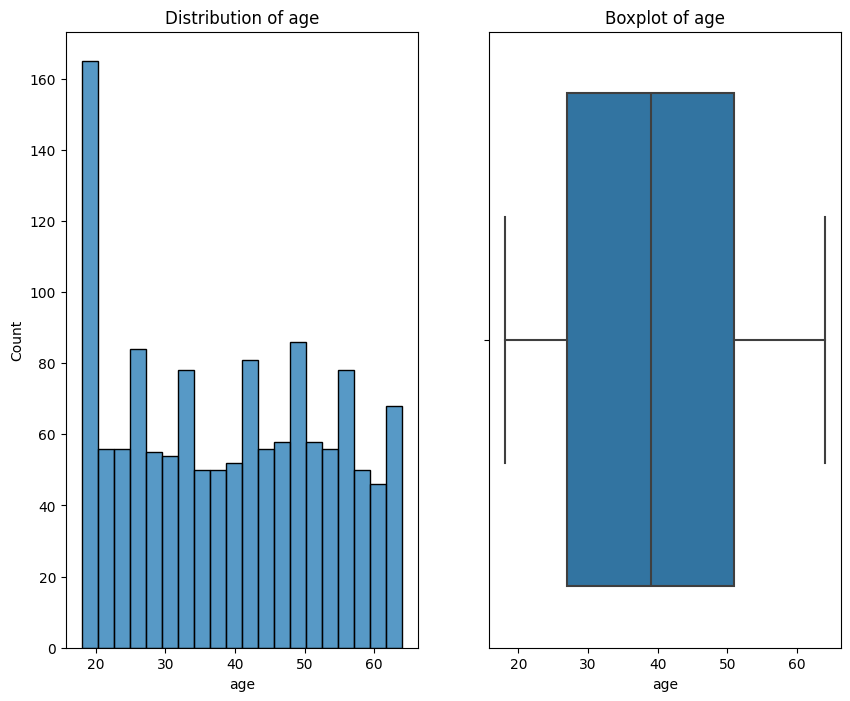

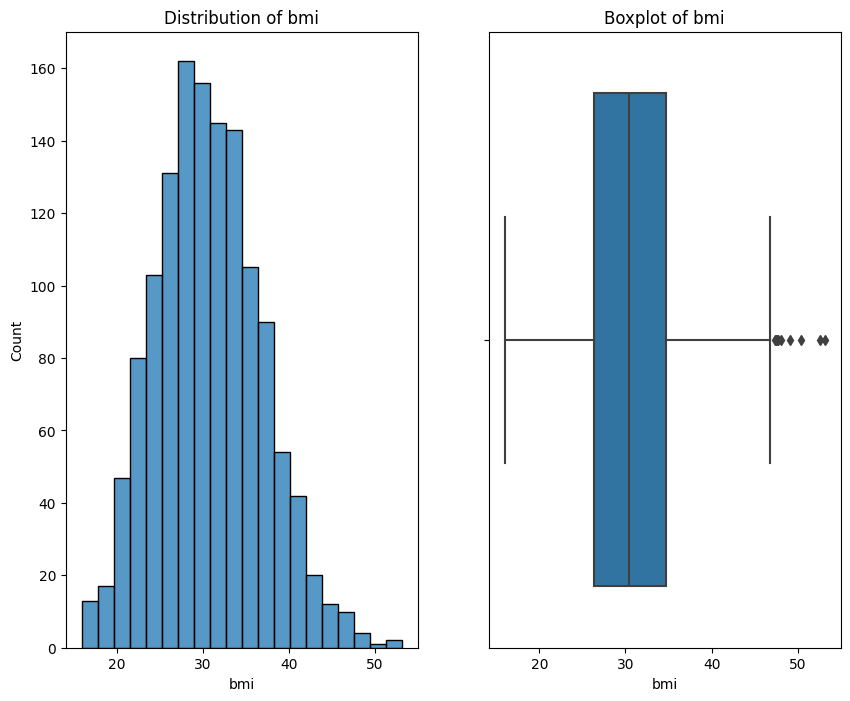

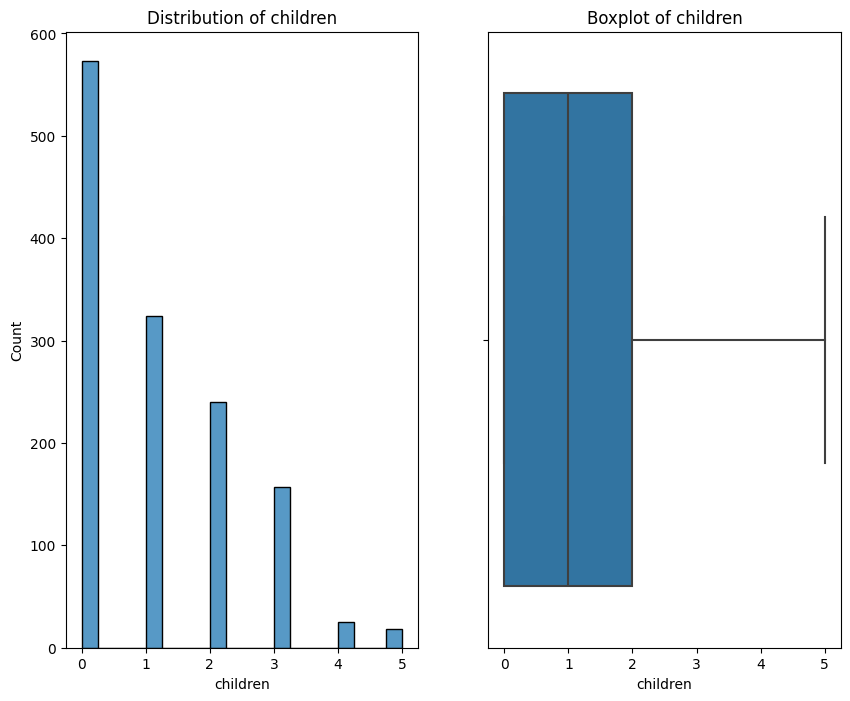

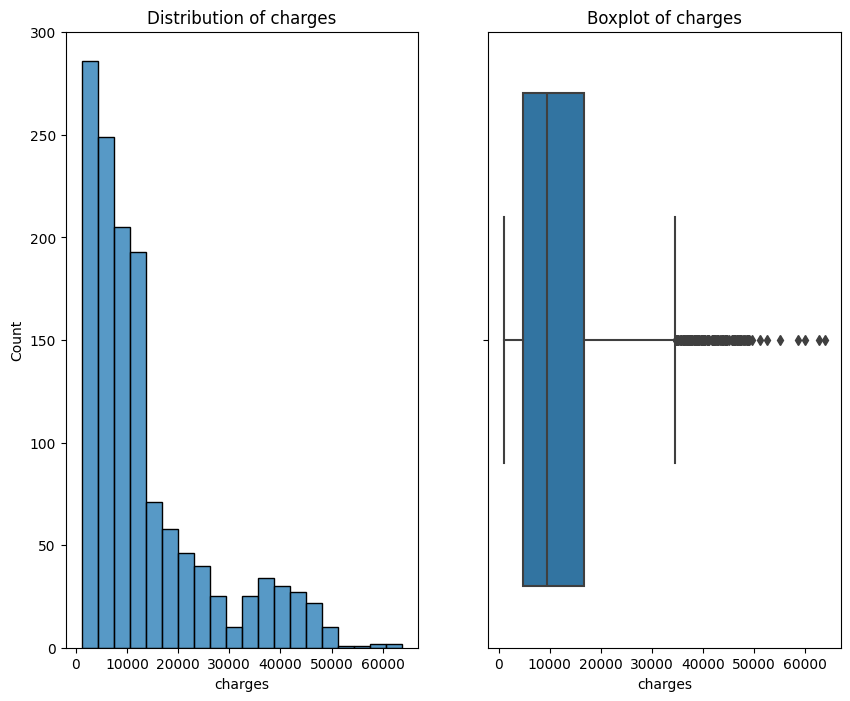

In [21]:
plot_numerical_data(df)

Text(0.5, 1.0, 'Distribution of Sex')

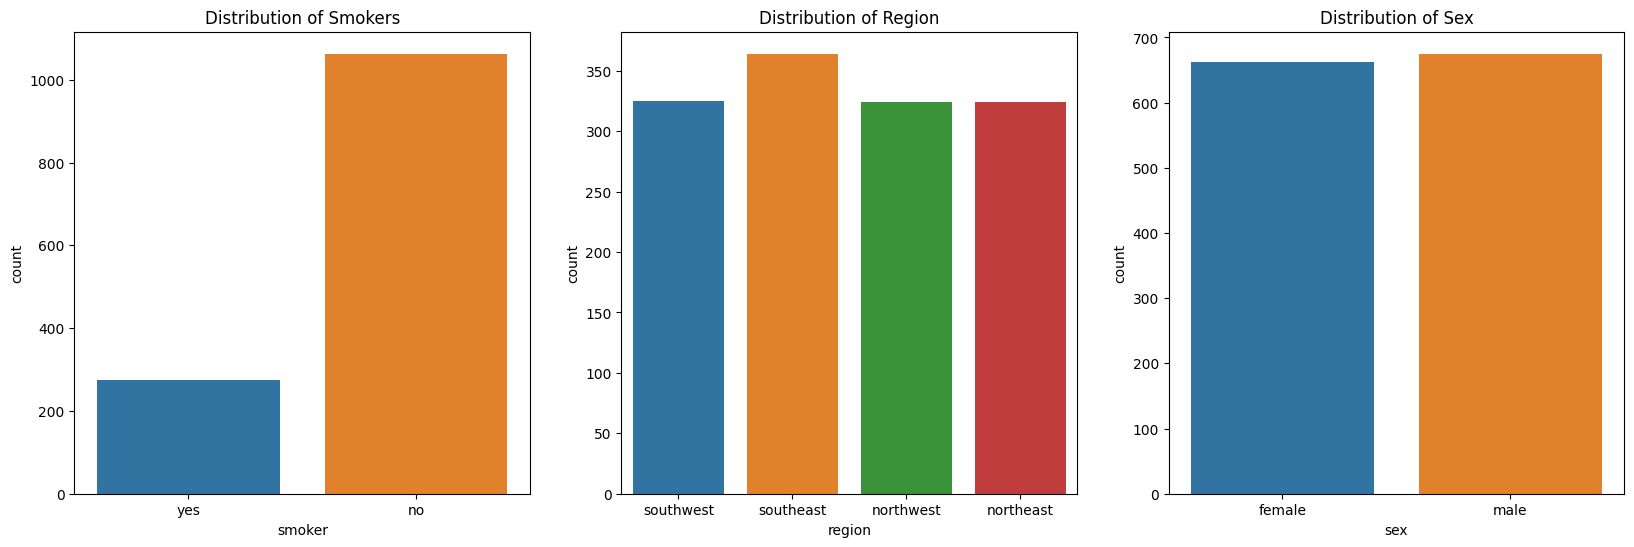

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20,6))

sns.countplot(data=df, x='smoker', ax=axs[0])
axs[0].set_title('Distribution of Smokers')

sns.countplot(data=df, x='region', ax=axs[1])
axs[1].set_title('Distribution of Region')

sns.countplot(data=df, x='sex', ax=axs[2])
axs[2].set_title('Distribution of Sex')

From the above charts, we observe that the dataset includes:

* A larger number of non-smokers.

* Balance between the genders of the insured individuals.

* Balance between the residential areas of the insured individuals.

C:\Users\UserX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UserX\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Charges for Non Smokers')

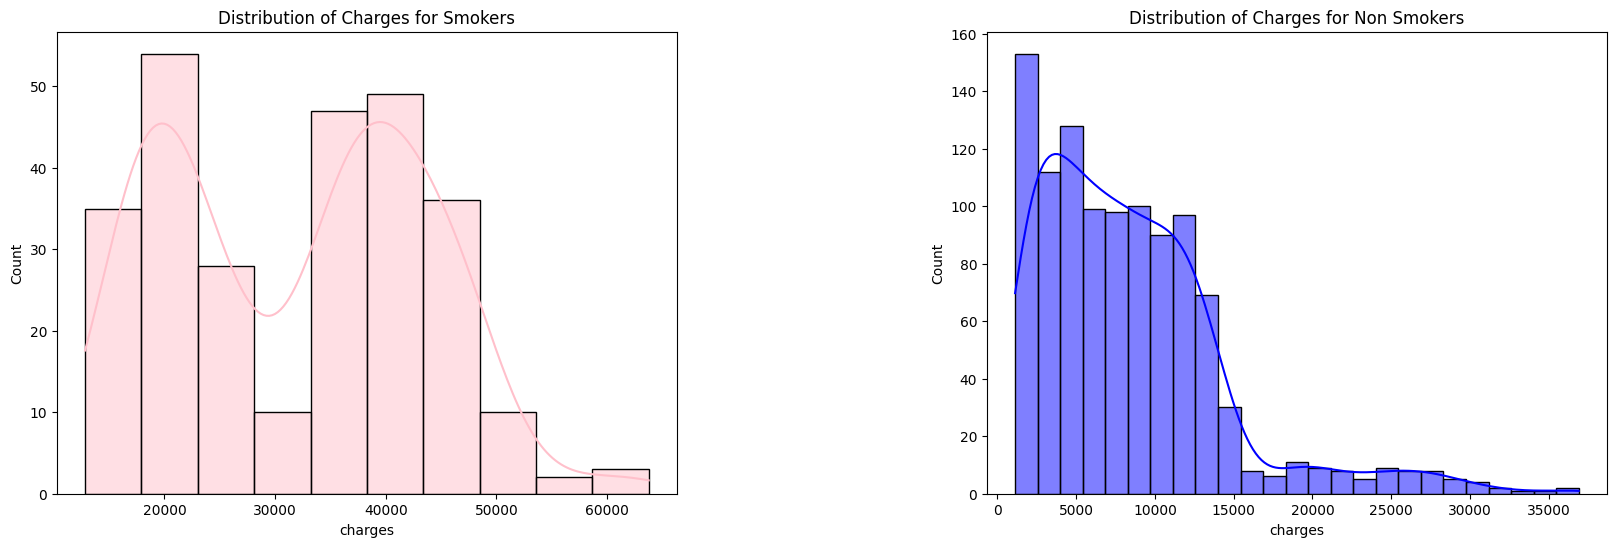

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
fig.subplots_adjust(wspace=0.5)

sns.histplot(df[df.smoker == 'yes']['charges'], color = 'pink', ax = axs[0], kde=True)
axs[0].set_title('Distribution of Charges for Smokers')

sns.histplot(df[df.smoker == 'no']['charges'], color = 'blue', ax = axs[1], kde=True)
axs[1].set_title('Distribution of Charges for Non Smokers')

**We conclude that for patients who are smokers, the insurance charges a higher amount for medical expenses.**

Text(0.5, 1.0, 'Number of smokers across sexes')

<Figure size 1200x600 with 0 Axes>

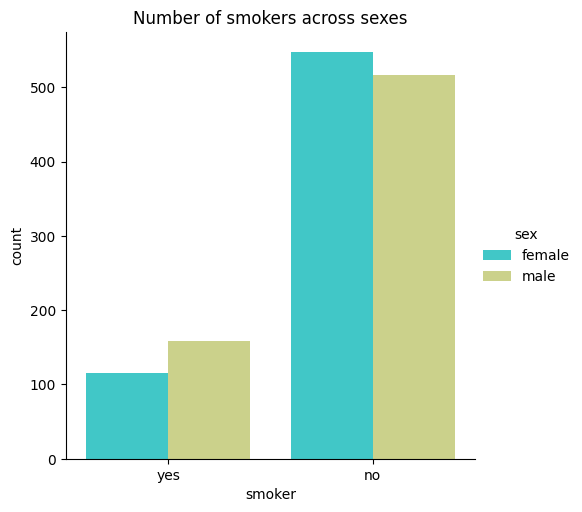

In [24]:
plt.figure(figsize=(12,6))

sns.catplot(data=df, x='smoker', hue='sex', kind='count', palette='rainbow')
plt.title('Number of smokers across sexes')

We see that there is a **larger number of male smokers**, so they are likely to have **higher treatment costs.**

Text(0.5, 1.0, 'Medical charges across regions for smokers and non-smokers')

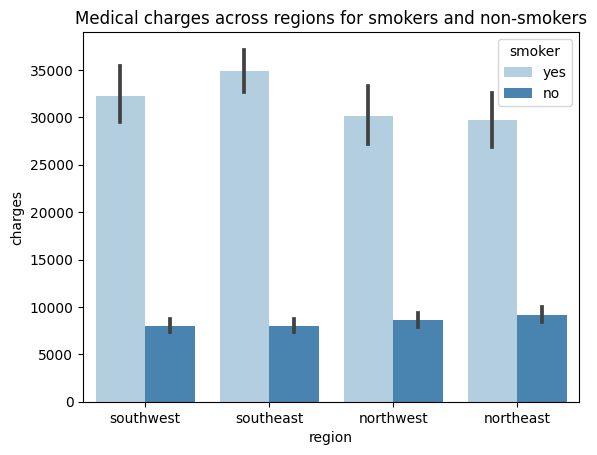

In [25]:
sns.barplot(data=df, x='region', y='charges', hue='smoker', palette='Blues')
plt.title('Medical charges across regions for smokers and non-smokers')

As expected, smokers have higher medical expenses. However, the amount spent by smokers from different residential areas does not show a significant difference. ***Therefore, we can conclude that the place of residence does not play an important role in medical expenses.***

Text(0.5, 1.0, 'Medical charges across regions for both sexes')

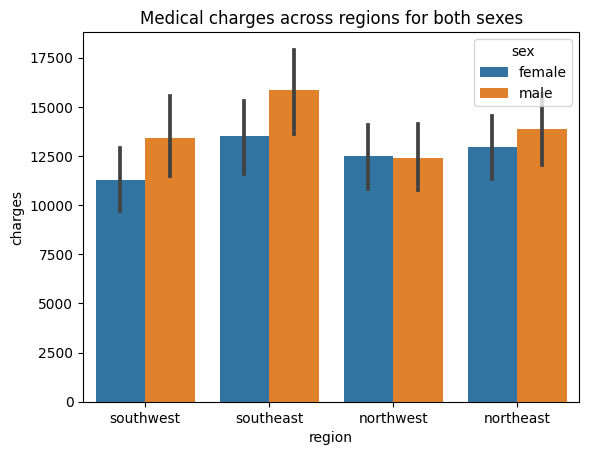

In [26]:
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.title('Medical charges across regions for both sexes')

*    In all residential areas except the Northwest, the insurance company pays a **higher amount** in medical expenses for **men.** This appears to be related to the fact that **most men are smokers**, and the amount spent on smokers is higher than what is spent on non-smokers.
*    In the Northwest, there might be more **non-smoking men** or more **smoking women,** which is why the amount spent is the same for both genders.

In [27]:
df['Weight Condition'] = df['bmi'].apply(get_weight_condition)

<Axes: xlabel='bmi', ylabel='charges'>

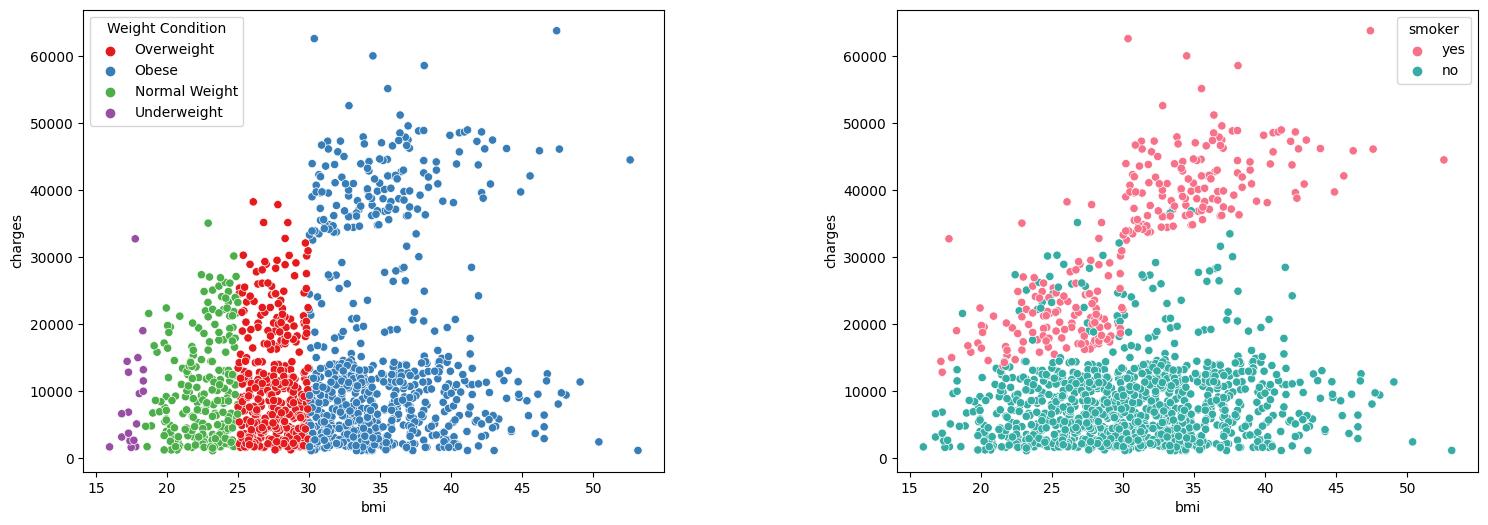

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(wspace=0.4)

sns.scatterplot(data=df, x='bmi', y='charges', hue='Weight Condition', ax=axs[0], palette='Set1')
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', ax=axs[1], palette='husl')

A ***slight positive*** **correlation** is observed between **BMI and medical expenses.**

By comparing the two charts above, we can see that:

* Smoking (as shown in the data) increases medical expenses.

However, it appears that:

* **When weight and smoking status are combined, medical expenses increase significantly.** This is particularly noticeable for individuals with a Body Mass Index (BMI) greater than 35.

<Axes: xlabel='bmi', ylabel='charges'>

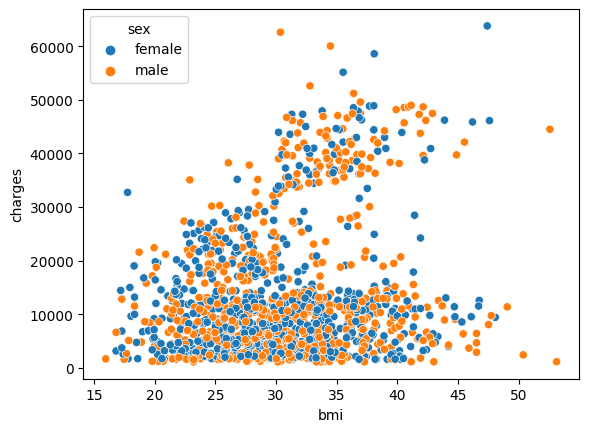

In [29]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='sex')

We observe that **most people with a BMI > 30, for whom medical expenses are high, tend to be men**. This is directly related to the fact that **most smokers are men.**

However, gender is not a good grouping indicator for medical expenses in relation to BMI, **because the observations are not linearly separable**.

<Axes: xlabel='age', ylabel='charges'>

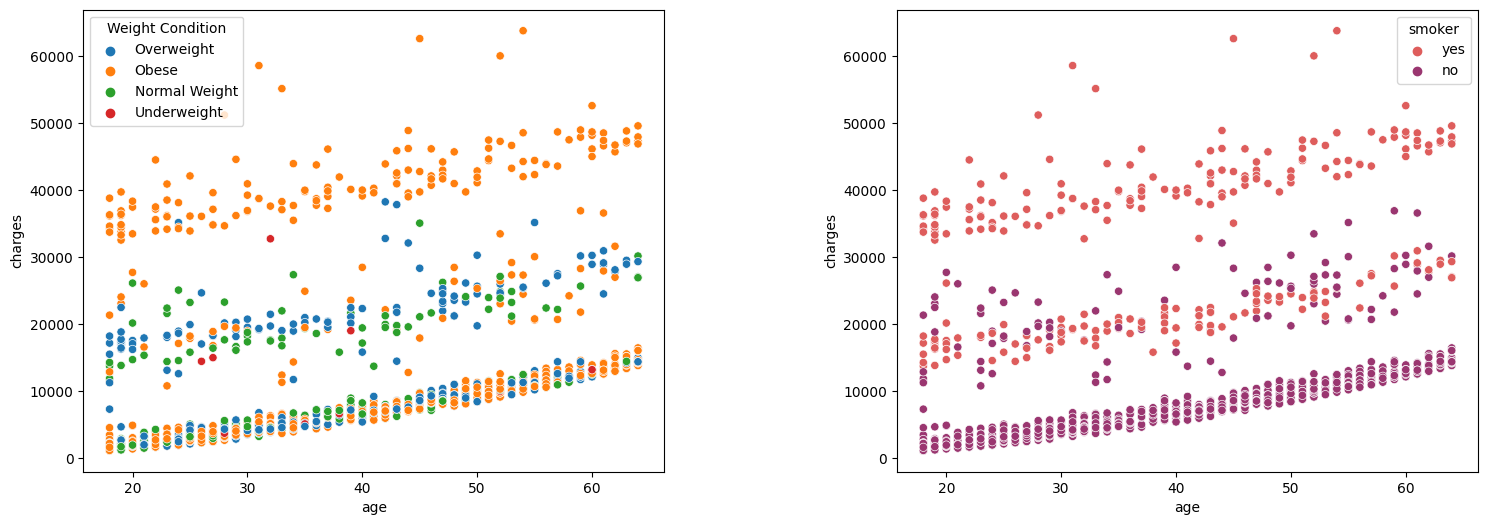

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(18,6))
fig.subplots_adjust(wspace=0.4)

sns.scatterplot(data=df, x='age', y='charges', hue='Weight Condition', ax=axs[0])
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='flare', ax=axs[1])

*   As age increases, medical expenses obviously increase, but not significantly if the person is not a smoker.

*   **BMI plays an important role in the amount spent**, as it appears that for younger individuals who are obese, medical expenses are high.
      + Comparing with the adjacent graph, we find that these individuals are also smokers.


*   We also observe that for **older individuals with a high BMI who do not smoke, the cost is lower**.

Therefore, it is determined that **BMI does not play as decisive a role in the amount spent as much as whether the person is a smoker.**

<Axes: xlabel='age', ylabel='charges'>

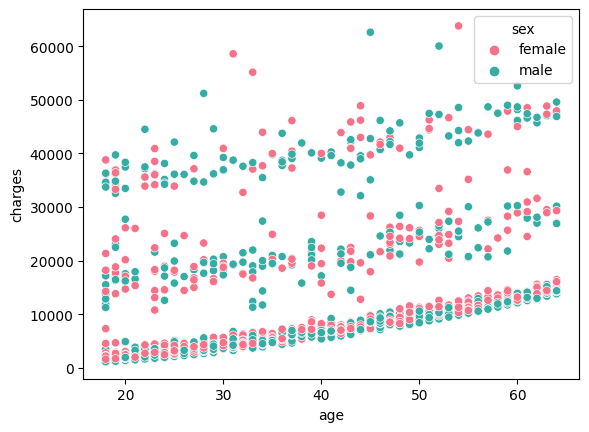

In [31]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex', palette='husl')

As shown in the diagram above, **gender does not affect the medical amount spent across different ages.**

However, we can observe that:

*    ***The majority of individuals with high medical expenses are men***. This is obviously **related to the fact that they are also smokers.**


After this analysis, we conclude that **BMI combined with smoking significantly increases medical expenses**, while **age does not play as significant a role.**

In [32]:
df.to_csv('insurance_cleaned.csv', index=False)

In [33]:
df1 = df.copy()
#df1.head()

In [34]:
df1.drop('Weight Condition', axis=1, inplace=True)
#df1.head()

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['sex'] = le.fit_transform(df1['sex'])
df1['smoker'] = le.fit_transform(df1['smoker'])
df1['region'] = le.fit_transform(df1['region'])

<Axes: >

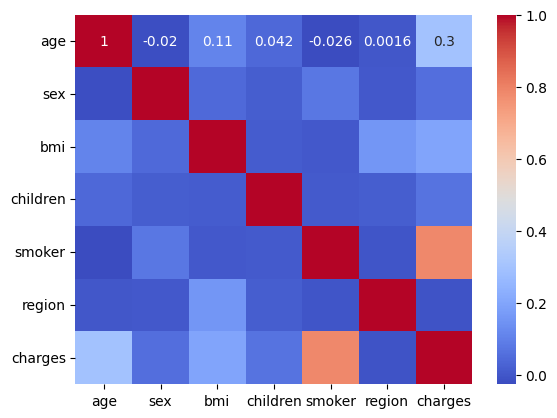

In [36]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

* Smoking is strongly associated with the amount spent on treatments.
* Smoking shows a stronger correlation with BMI than with age.
  
**We can group BMI and expenditures by smoking status to create distinct patient groups. Based on the amount spent and BMI, it can be predicted whether they are smokers or not.**

## Data Preprocessing

In [32]:
X = df1.loc[:, ['bmi', 'charges']]
y = df1.loc[:, ['smoker']]

In [33]:
y = y.to_numpy()
y_true = y.reshape([1337,])

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [36]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Elbow Method

C:\Users\UserX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\UserX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\UserX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\UserX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

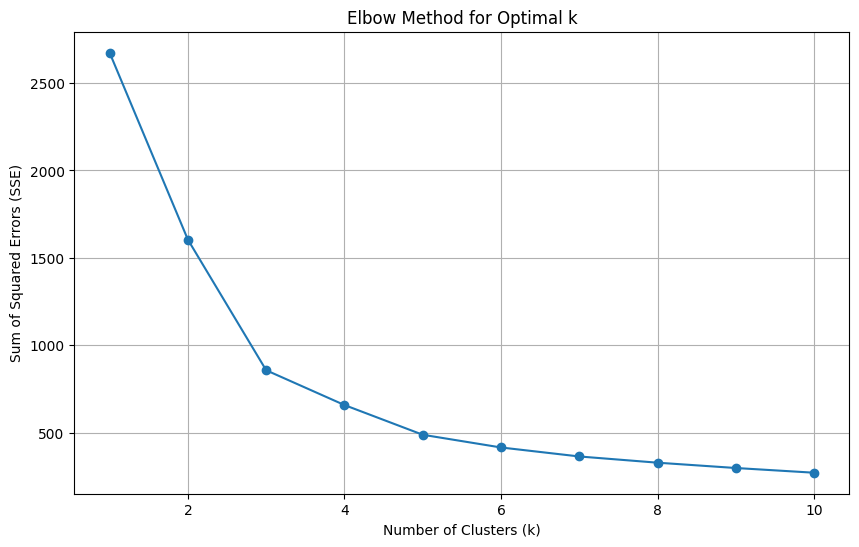

In [37]:
sse = []
k_list = range(1, 11)

for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(k_list, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## Clustering

C:\Users\UserX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\UserX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


              bmi       charges
kmeans                         
0       25.832609  10049.818454
1       35.752875   7971.556952
2       34.726967  39173.815757


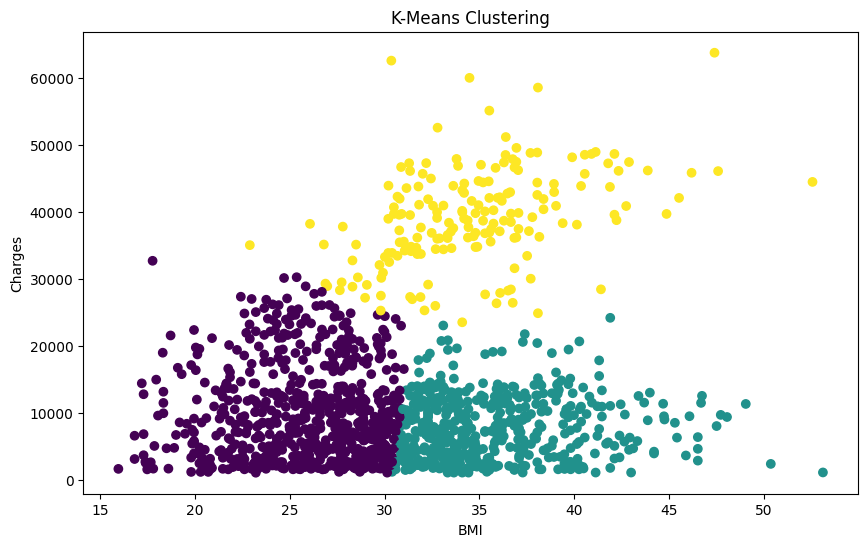

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_X)
X['kmeans'] = kmeans_labels

kmeans_analysis = X.groupby('kmeans')[['bmi', 'charges']].mean()
print(kmeans_analysis)

plt.figure(figsize=(10,6))

plt.scatter(X['bmi'], X['charges'], c=kmeans_labels)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('K-Means Clustering')

plt.show()

## K-Means Cluster Analysis

*  Three clusters have been created after applying K-Means.

    + The first cluster (purple color) includes patients with **BMI ranging from 15 to 30, who have relatively low medical expenses.** However, it seems that a **small number of smokers are included in this cluster**, as we observe that the **cost ranges from low values to slightly higher ones.**

    + The second cluster (green color) includes patients with **BMI greater than 30 (i.e., obese), who have low medical expenses.** Therefore, we can conclude that **this cluster does not include smokers.**

    + The third cluster (yellow color) includes patients with **BMI greater than 22 (with the majority being obese), who have high medical expenses.** That is, we observe that **this cluster only includes smokers.**

C:\Users\UserX\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


           bmi       charges
gmm                         
0    26.674224  17300.082044
1    31.183882   6398.829408
2    34.509891  39211.803562


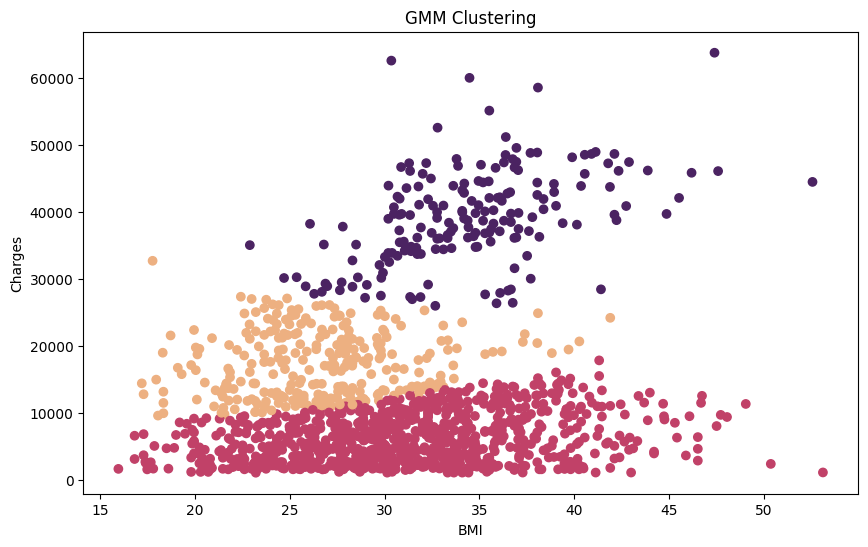

In [39]:
gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(scaled_X)
X['gmm'] = gmm_labels

gmm_analysis = X.groupby('gmm')[['bmi', 'charges']].mean()
print(gmm_analysis)

plt.figure(figsize=(10,6))

plt.scatter(X['bmi'], X['charges'], c=gmm_labels, cmap='flare')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('GMM Clustering')

plt.show()

## Gaussian Mixture Model Clusters Analysis

*  The clusters resulting from the application of GMM differ from those obtained from K-Means.

  + The first cluster (beige color) includes patients with **BMI ranging from 15 to 55, who have low medical expenses.** Therefore, this group includes non-smokers.

    + The second cluster (purple color) includes patients with **relatively low BMI and higher medical expenses**. Hence, **some of the patients in this group may be ***smokers***, while others might have higher costs due to having a ***higher BMI.*****

    + The third cluster (pink color) includes patients with a **slightly higher BMI than those in the second cluster, and high costs**. Therefore, we can conclude that ***this cluster consists of smokers.***

## Evaluation Metrics

In [40]:
silhouette_kmeans = silhouette_score(scaled_X, kmeans_labels)
silhouette_gmm = silhouette_score(scaled_X, gmm_labels)

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for GMM Clustering: {silhouette_gmm}")

print()

ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_gmm = adjusted_rand_score(y_true, gmm_labels)

print(f"Adjusted Rand Score for K-Means: {ari_kmeans}")
print(f"Adjusted Rand Score for GMM Clustering: {ari_gmm}")

Silhouette Score for K-Means: 0.44461358538506635
Silhouette Score for GMM Clustering: 0.2716704183035273

Adjusted Rand Score for K-Means: 0.20584529080632302
Adjusted Rand Score for GMM Clustering: 0.5156377845938861



We can see that for this particular dataset, K-Means achieves better results, as it has a higher Silhouette Score.

As for the comparison with the actual values of the variable y (which indicates whether the patient is a smoker):

* GMM has a **higher Adjusted Rand Score**. However, it cannot reach a value of 1 because the groups created by the algorithm are 3, while the actual groups are 2.

## Linear Regression for predicting medical charges

In [41]:
df2 = df.copy()
df2.head()

,age,sex,bmi,children,smoker,region,charges,Weight Condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
y = df2.loc[:, 'charges']
X = df2.loc[:, ['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [46]:
le = LabelEncoder()

X['age'] = le.fit_transform(X['age'])
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['region'] = le.fit_transform(X['region'])

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X.values, y, test_size=0.3, shuffle=True, random_state=42)

print("Number of Observations in the Data set:" , X.values.shape[0]) 
print("Number of Observations in Train set:", x_train.shape[0])
print("Number of Observations in Test set:" , x_test.shape[0]) 

Number of Observations in the Data set: 1337
Number of Observations in Train set: 935
Number of Observations in Test set: 402


In [48]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_standardized = scaler.transform(x_train)
x_test_standardized = scaler.transform(x_test)

#print("train set, 1st variable mean:", x_train_standardized[:,0].mean(), "standard deviation:", x_train_standardized[:,0].std())

In [49]:
lr = LinearRegression()
lr.fit(x_train_standardized, y_train)
y_pred = lr.predict(x_test_standardized)

test_mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("The Mean Absolute Error of the Linear Regression Model on the Test Data is:", test_mae)
print("The Coefficient of Determination of the Linear Regression Model on the Test Data is:", r_squared)

The Mean Absolute Error of the Linear Regression Model on the Test Data is: 4182.803777070157
The Coefficient of Determination of the Linear Regression Model on the Test Data is: 0.7724652729621759


**Mean Absolute Error of the regression model is 4182.8** – which, considering that the **average value of charges is around 9000**, means that the **predicted charges are not well aligned with the actual values.**
**This likely happens because there are outliers in the dataset.**

Additionally, the **coefficient of determination is around 77%,** which means that 77% of the variance in the dependent variable (charges) can be explained by the independent variables, or simply, that 77% of the data fits the regression model.

**Therefore, the model predicts the charges with an accuracy of 77%.**

**The coefficient of determination could be higher if there were no outliers.**